## Plotting and comparing trap average PDFs to seasonal water column PDFs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
import seaborn as sns

Importing data

In [ ]:
water_SM = pd.read_csv('../../data/LISST/corrected_GSDs/SM23_WC_normalized_GSD_corrected.csv')
trap_SM = pd.read_csv('../../data/sediment_traps/SM23_trap_normalized_GSD_LISST.csv')
water_SP = pd.read_csv('../../data/LISST/corrected_GSDs/SP23_WC_normalized_GSD_corrected.csv')
trap_SP = pd.read_csv('../../data/sediment_traps/SP23_trap_normalized_GSD_LISST.csv')

# getting information
grain_sizes = np.array(water_SM.iloc[:, 0])
water_SM_array = np.array(water_SM.iloc[:, 1:]) # spring water column
trap_SM_array = np.array(trap_SM.iloc[:, 1:]) # spring sediment traps
water_SP_array = np.array(water_SP.iloc[:, 1:]) # summer water column
trap_SP_array = np.array(trap_SP.iloc[:, 1:]) # summer sediment traps

Calculations

In [13]:
# calculating max, avg and min GSDs of the water columns
spring_wc_gsd_max = pd.DataFrame(np.max(water_SP_array, axis=1))
spring_wc_gsd_avg = pd.DataFrame(np.mean(water_SP_array, axis=1))
spring_wc_gsd_min = pd.DataFrame(np.min(water_SP_array, axis=1))
summer_wc_gsd_max = pd.DataFrame(np.max(water_SM_array, axis=1))
summer_wc_gsd_avg = pd.DataFrame(np.mean(water_SM_array, axis=1))
summer_wc_gsd_min = pd.DataFrame(np.min(water_SM_array, axis=1))

# calculating max, avg and min GSDs of the baskets
spring_st_gsd_max = pd.DataFrame(np.max(trap_SP_array, axis=1))
spring_st_gsd_avg = pd.DataFrame(np.mean(trap_SP_array, axis=1))
spring_st_gsd_min = pd.DataFrame(np.min(trap_SP_array, axis=1))
summer_st_gsd_max = pd.DataFrame(np.max(trap_SM_array, axis=1))
summer_st_gsd_avg = pd.DataFrame(np.mean(trap_SM_array, axis=1))
summer_st_gsd_min = pd.DataFrame(np.min(trap_SM_array, axis=1))

In [14]:
# add max, avg and min GSDs to the dataframes as new columns
water_SP["max"] = spring_wc_gsd_max
water_SP["avg"] = spring_wc_gsd_avg
water_SP["min"] = spring_wc_gsd_min
water_SM["max"] = summer_wc_gsd_max
water_SM["avg"] = summer_wc_gsd_avg
water_SM["min"] = summer_wc_gsd_min

trap_SP['max'] = spring_st_gsd_max
trap_SP['avg'] = spring_st_gsd_avg
trap_SP['min'] = spring_st_gsd_min
trap_SM['max'] = summer_st_gsd_max
trap_SM['avg'] = summer_st_gsd_avg
trap_SM['min'] = summer_st_gsd_min

### Plotting

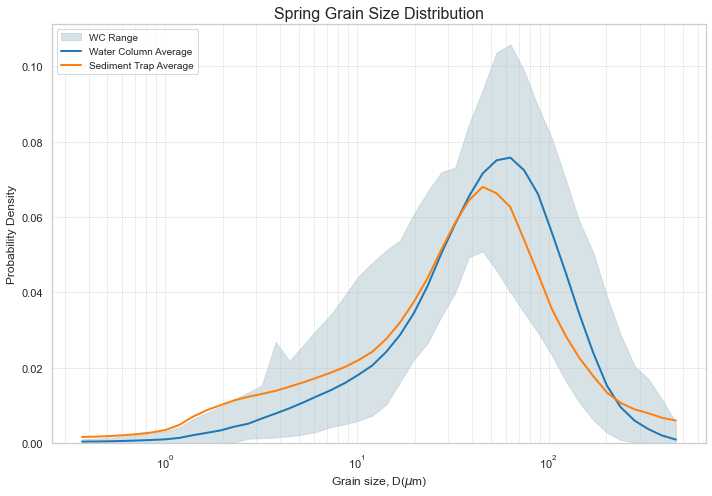

In [15]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the faded distribution between min and max (Water Column)
ax.fill_between(grain_sizes, water_SP['min'], water_SP['max'], color='#AEC6CF', alpha=0.5, label='WC Range')

# Plot the average lines
ax.plot(grain_sizes, water_SP['avg'], color='#1F77B4', linewidth=2, label='Water Column Average')
ax.plot(grain_sizes, trap_SP['avg'], color='#FF7F0E', linewidth=2, label='Sediment Trap Average')

# --- Step 4: Add Plot Labels and Aesthetics ---
ax.set_title('Spring Grain Size Distribution', fontsize=16)
ax.set_xlabel('Grain size, D($\mu$m)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xscale('log') # Use a logarithmic scale for the x-axis
ax.set_ylim(bottom=0) # Ensure the y-axis starts at 0

ax.legend(loc='upper left', frameon=True, fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()